Let E be an unsorted set of n segments that are the edges of a convex
polygon. Describe an O(nlogn) algorithm that computes from E a list
containing all vertices of the polygon, sorted in clockwise order.

To solve this problem, we can follow the following steps:

1. Create an empty list called "vertices" to store the vertices of the polygon.
2. Iterate through each segment in the set E.
3. For each segment, extract its two endpoints and add them to the "vertices" list if they are not already present.
4. Sort the "vertices" list in counterclockwise order based on their polar angles with respect to the centroid of the polygon.
5. Reverse the "vertices" list to obtain the vertices in clockwise order.
6. Return the sorted "vertices" list.

The time complexity of this algorithm is O(nlogn) because the sorting step takes O(nlogn) time.


In [61]:
import math
import matplotlib.pyplot as plt

In [62]:


def compute_polygon_vertices(E):
    # E = unsorted_points
    
    vertices = []
    centroid_x = 0
    centroid_y = 0

    # Step 2: Iterate through each segment in E
    for i in range(0, len(E), 2):
        # Step 3: Extract endpoints of the segment
        start_point, end_point = E[i], E[i+1]

        # Add start_point to vertices if not already present
        if start_point not in vertices:
            vertices.append(start_point)
            centroid_x += start_point[0]
            centroid_y += start_point[1]

        # Add end_point to vertices if not already present
        if end_point not in vertices:
            vertices.append(end_point)
            centroid_x += end_point[0]
            centroid_y += end_point[1]

    # Step 4: Sort vertices based on polar angles with respect to centroid
    centroid_x /= len(vertices)
    centroid_y /= len(vertices)
    vertices.sort(key=lambda point: math.atan2(point[1] - centroid_y, point[0] - centroid_x))

    # Step 5: Reverse vertices to obtain clockwise order
    vertices.reverse()

    # Step 6: Return sorted vertices
    return vertices

In [63]:
test = [(0,0), (1,0), (2,0), (3,1), (4,2), (0.5,1.5), (5,3), (4, 6), (2, 5), (1, 3)]
vert = compute_polygon_vertices(test)
vert

[(1, 3),
 (2, 5),
 (4, 6),
 (5, 3),
 (4, 2),
 (3, 1),
 (2, 0),
 (1, 0),
 (0, 0),
 (0.5, 1.5)]

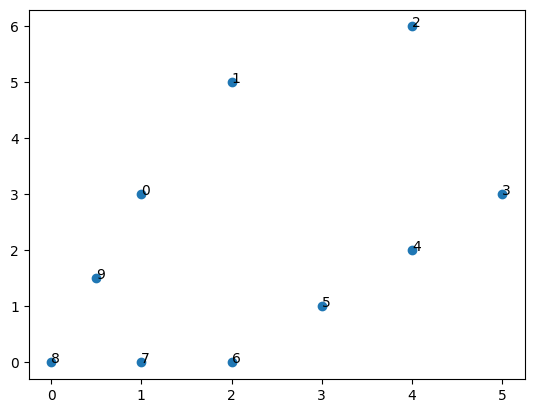

In [64]:
# plt.scatter(y , x)
x = [i[0] for i in vert]
y = [i[1] for i in vert]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(x):
    ax.annotate(i, (x[i], y[i]))